In [2]:
#feature selection
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df=pd.read_csv("E:/3.dataset_150_1.csv")
X=df.iloc[:,:22]
#y=df['output_grade']
#yc = df.iloc[:,22:23].values


<AxesSubplot:>

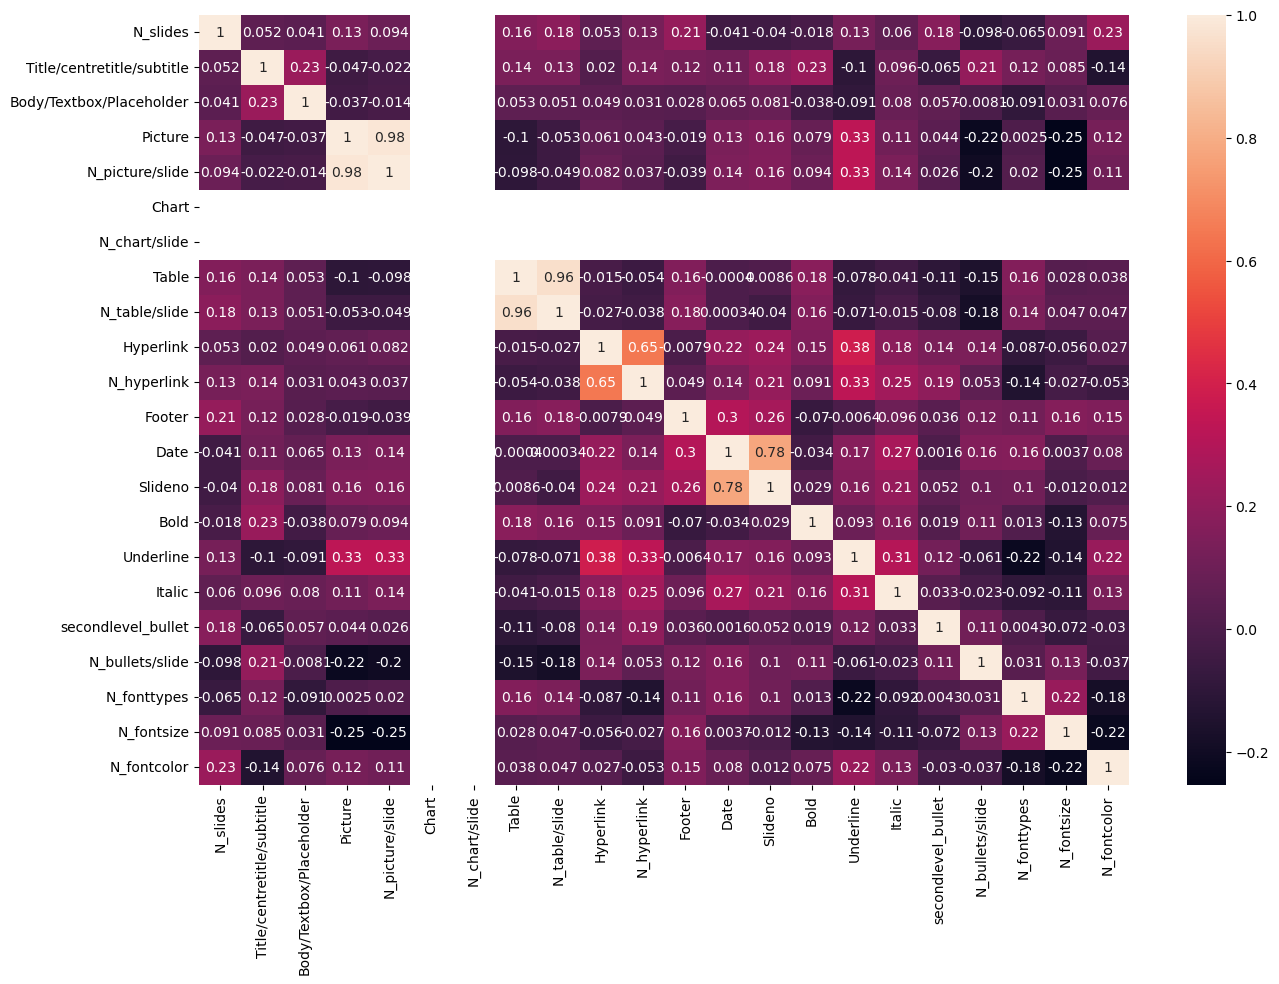

In [3]:
import seaborn as sns
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [75]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
yc = df.iloc[:,18:19].values


<AxesSubplot:title={'center':'Comparison of different Feature Importances using Information Gain'}, xlabel='Feature Labels', ylabel='Feature Importances'>

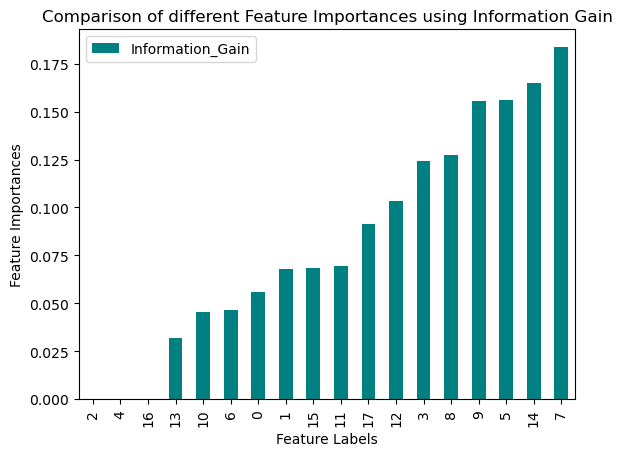

In [144]:
#information gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances=mutual_info_classif(X,y)
#feat_impo=pd.Series(importances, df.columns[0:18])
#feat_impo.plot(kind='barh', color='teal',xlabel='Features',ylabel='Feature Importances',
 #              title='Comparison of different Feature Importances')
#final_df.set_index('importances')
#final_df=final_df.sort_values('importances')
#plt.show()

final_df=pd.DataFrame({"Information_Gain":importances,"features":pd.DataFrame(X).columns})
final_df.set_index('Information_Gain')
final_df=final_df.sort_values('Information_Gain')

final_df.plot.bar(color='teal',xlabel='Feature Labels',ylabel='Feature Importances',title='Comparison of different Feature Importances using Information Gain')



In [142]:
pip install skfeature-chappers

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'Comparison of different Feature Importances using Fishers Score'}, xlabel='Feature Labels', ylabel='Feature Importances'>

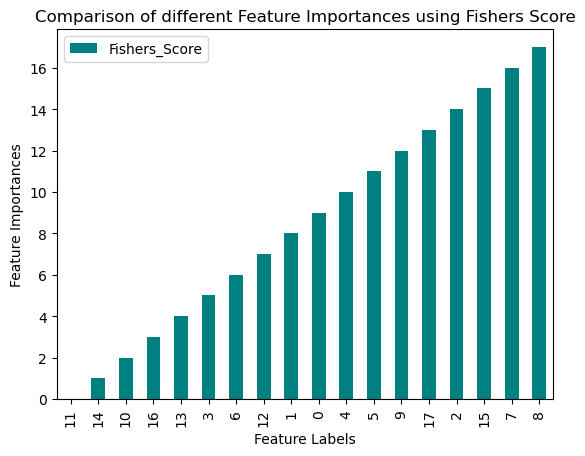

In [146]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline
#score
rank=fisher_score.fisher_score(X.to_numpy(),y.to_numpy())
#feat_impo=pd.Series(rank, df.columns[0:18])
#feat_impo.plot(kind='barh', color='teal')
#plt.show()

final_df=pd.DataFrame({"Fishers_Score":rank,"features":pd.DataFrame(X).columns})
final_df.set_index('Fishers_Score')
final_df=final_df.sort_values('Fishers_Score')

final_df.plot.bar(color='teal',xlabel='Feature Labels',ylabel='Feature Importances',title='Comparison of different Feature Importances using Fishers Score')

In [88]:
#LASSO REgularization
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
#set regularization parameter c=1
logistic=LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X,y)
model=SelectFromModel(logistic, prefit=True)
X_new=model.transform(X)
#dropped columns having value 0
select_col=df.columns[df.var()!=0]
select_col

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['N_slides', 'Title/centretitle/subtitle', 'Body/Textbox/Placeholder',
       'N_picture/slide', 'N_table/slide', 'N_hyperlink', 'Footer', 'Date',
       'Slideno', 'Bold', 'Underline', 'Italic', 'secondlevel_bullet',
       'N_bullets/slide', 'N_fonttypes', 'N_fontsize', 'N_fontcolor',
       'output_grade'],
      dtype='object')

<AxesSubplot:title={'center':'Comparison of different Feature Importances using Random Forest'}, xlabel='Feature Labels', ylabel='Feature Importances'>

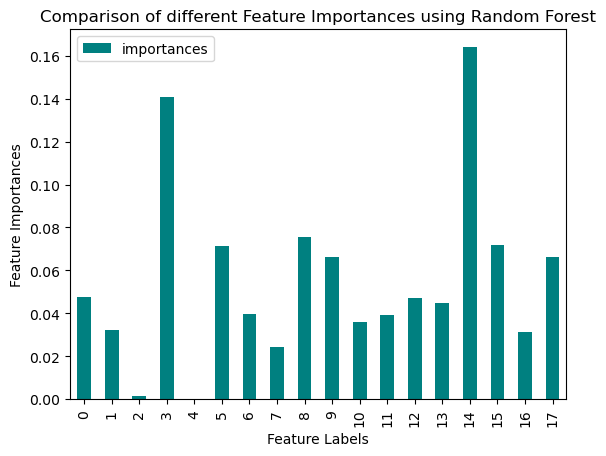

In [125]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=340)
model.fit(X,y)
importances=model.feature_importances_

final_df=pd.DataFrame({"features":pd.DataFrame(X).columns,"importances":importances})
final_df.set_index('importances')
#final_df=final_df.sort_values('importances')
final_df.plot.bar(color='teal',xlabel='Feature Labels',ylabel='Feature Importances',title='Comparison of different Feature Importances using Random Forest')


In [41]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier

In [121]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

<AxesSubplot:title={'center':'Comparison of different Feature Importances using Decision Tree'}, xlabel='Feature Labels', ylabel='Feature Importances'>

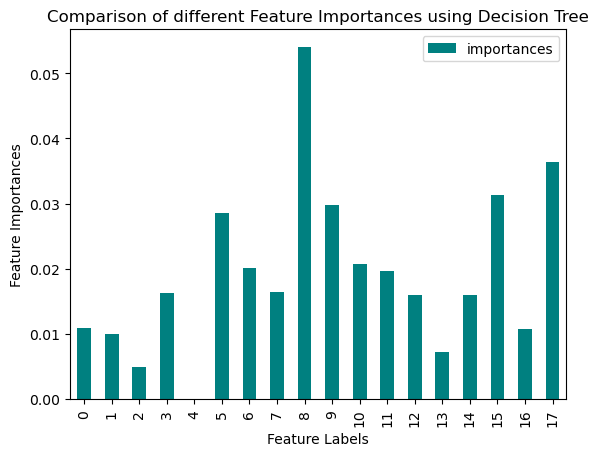

In [126]:
final_df=pd.DataFrame({"features":pd.DataFrame(X).columns,"importances":feature_importance_normalized})
final_df.set_index('importances')
#final_df=final_df.sort_values('importances')

final_df.plot.bar(color='teal',xlabel='Feature Labels',ylabel='Feature Importances',title='Comparison of different Feature Importances using Decision Tree')



In [68]:
from sklearn.feature_selection import chi2
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X_norm, y)

NameError: name 'MinMaxScaler' is not defined